# Problem Set 3

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown. You will submit only this notebook named: [jhed_id].ipynb back to Blackboard from whence you downloaded it. Do not return the data to me.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

## Abalone Data


This is a problem about Abalone...but not really. You should be able to use common knowledge to work with the data in this problem.

```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The target variable is Rings because it is a predictor of age. You can take this as your problem, "How do we estimate the age of an abalone from the available data?"

At a high level you have:

1. Question/Problem
2. ETL
3. EDA
4. Statistical and Mathematical Modeling.

Of necessity, there is very little ETL here except to verify that the data has loaded correctly and with the correct types. For the EDA and Modeling parts, follow the guidelines in *Fundamentals*. Do not use regression as it had not been covered yet; you may only use single value models (mean) or mathematical distributions.

**Begin**

## 1.1 Statement of the Problem

Discuss your approach to estimating the age of the abalone from the available data.

General plan is that once the ETL is done, I will examine all of the variables one by one, and paired with `rings` to see if there is any correlation between them. If there are any features which obviously do not have any correlation with `rings`, this would be a good point at which to think about not using them to help predict the age of an abalone. During the statistical and mathematical modeling portion, 

## 1.2 (ETL) Extract, Transform, Load the Data

In [1]:
# You can load the dataset directly from a URL in Pandas
import pandas as pd
df = pd.read_csv("abalone.csv", names=["sex","length","diameter","height","whole_weight","shucked_weight","viscera_weight","shell_weight","rings"])
df.sex = df.sex.astype("category")
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7
...,...,...,...,...,...,...,...,...,...
4172,F,113,90,33,177.4,74.0,47.8,49.8,11
4173,M,118,88,27,193.2,87.8,42.9,52.1,10
4174,M,120,95,41,235.2,105.1,57.5,61.6,9
4175,F,125,97,30,218.9,106.2,52.2,59.2,10


In this case, we have loaded data from a local CSV file. It did not have headers, so we added them manually. 

## 1.3 (EDA) Exploratory Data Analysis

To beging the EDA, let's investigate each feature by itself.

What columns does the data have?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   sex             4177 non-null   category
 1   length          4177 non-null   int64   
 2   diameter        4177 non-null   int64   
 3   height          4177 non-null   int64   
 4   whole_weight    4177 non-null   float64 
 5   shucked_weight  4177 non-null   float64 
 6   viscera_weight  4177 non-null   float64 
 7   shell_weight    4177 non-null   float64 
 8   rings           4177 non-null   int64   
dtypes: category(1), float64(4), int64(4)
memory usage: 265.4 KB


Everything except `sex` is a continuous numerical value. There are no null values.

Let's begin with `sex`, a categorical variable: male, female, or infant

Text(0.5, 0, 'Sex')

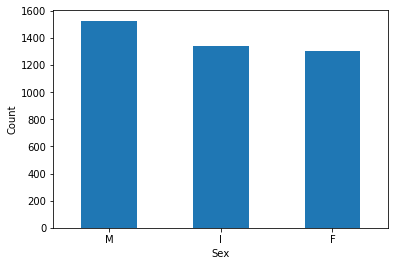

In [3]:
ax = df.sex.value_counts().plot.bar(rot = 0)
ax.set_ylabel("Count")
ax.set_xlabel("Sex")

There is a slight bias towards male specimens. Female and infant specimens have an approximately equal number.

Next up is `length`, a continuous feature. A histogram may help us understand its distrubution. 

In [4]:
import plotly.express as px

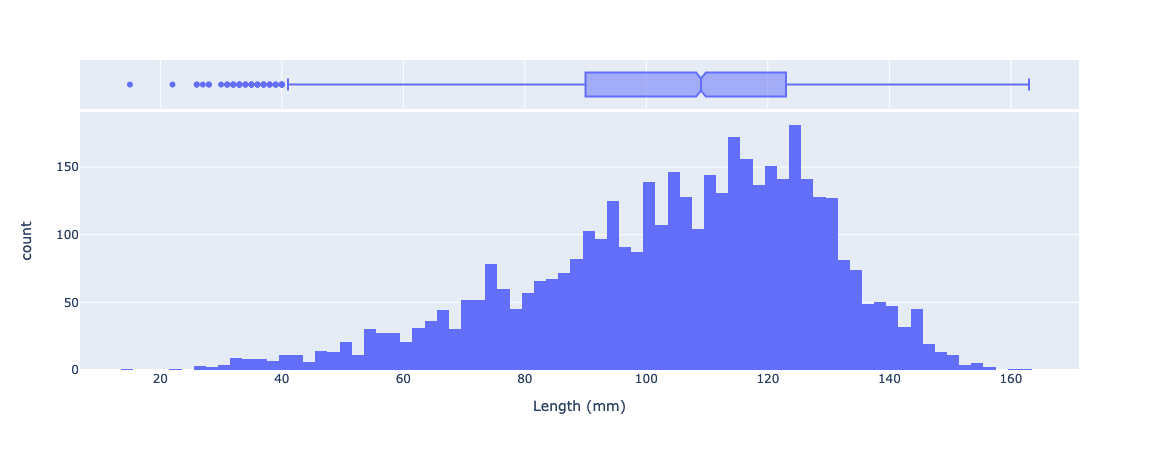

In [6]:
px.histogram(df, x = "length", marginal='box', labels={"length":"Length (mm)"})

From this, we can see that counts increase steadily with increasing length, and then drop off rather quickly on the higher end. A curve with a definite negative skew. Hovering over the histogram, the median is 109mm, and the inter-quartile range (IQR) goes from 90mm to 123mm. 

Next up is diameter, also a continuous feature. Again, a histogram may be helpful. 

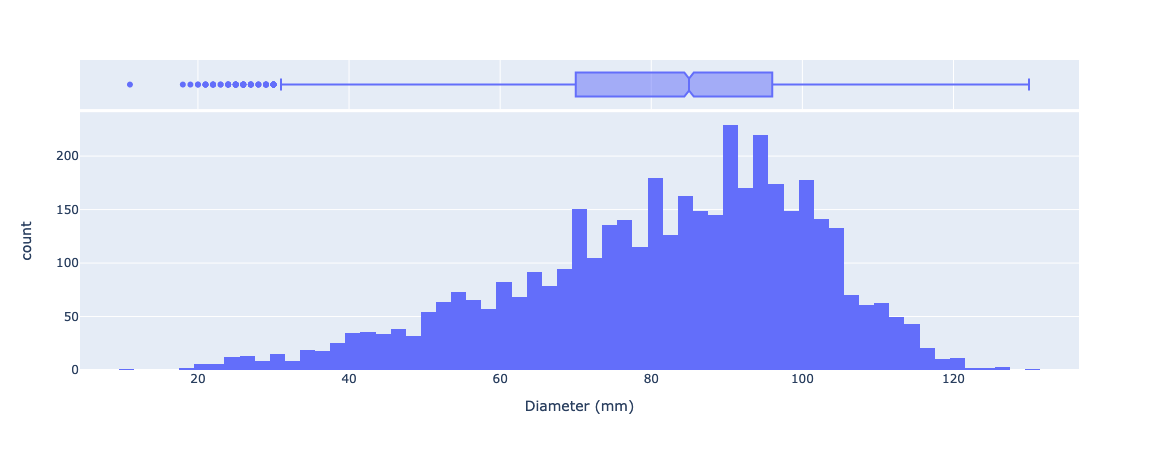

In [7]:
px.histogram(df, x = "diameter", marginal='box', labels={"diameter":"Diameter (mm)"})

`diameter` seems to have a very similar shape to `length`: both have a definite negative skew. 

Next is height. Again discrete. Let's use a histogram again.

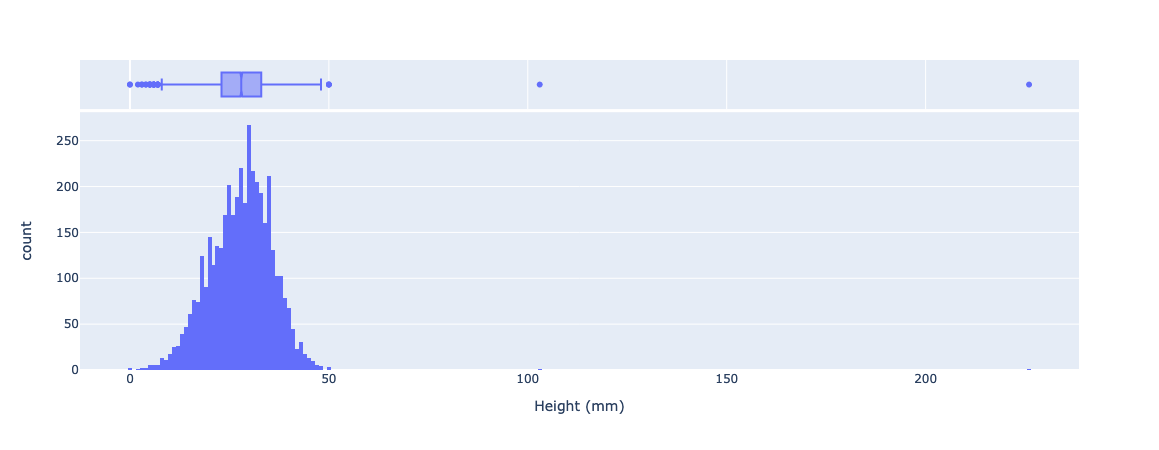

In [8]:
px.histogram(df, x = "height", marginal='box', labels={"height":"Height (mm)"})

The distrubtion of `height` takes a very different distribution than `length` and `diameter`. It is closer to a standard bell shape, and has several outliers. It is possible that these outliers are caused by human measurement error. The three dimensions are 
- `length`: Longest shell measurement
- `diameter`: perpendicular to length
- `height`: with meat in shell

Indeed, by these definitions, the dimension of 266mm measured as the `height` for one case must necessarily be the `length`, and not the height, as there is no `length` or `diameter` with a value that large. This makes it easier to toss out that particular measurement as a human error of some sort. 

Next is `whole_weight`, a continuous feature. Let's attempt a similar histogram as before.

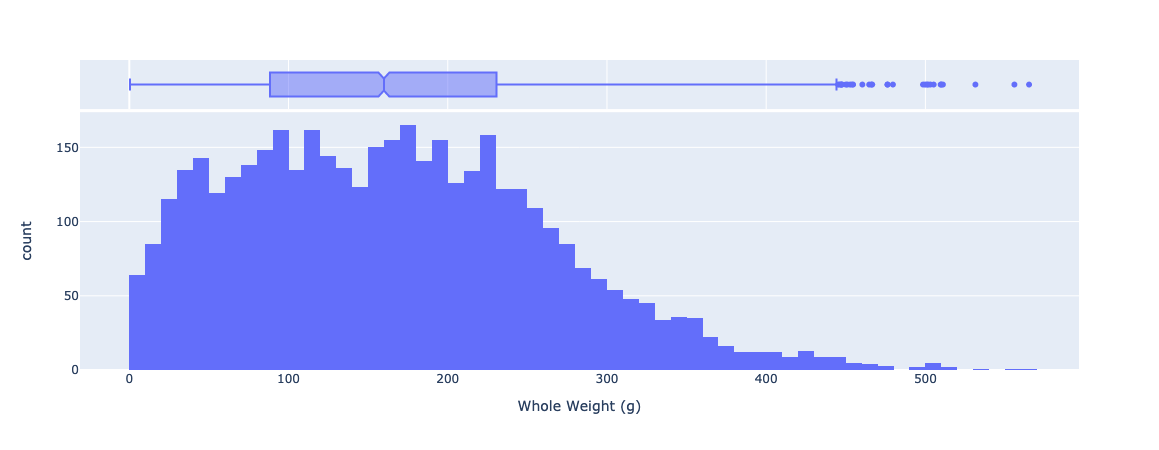

In [13]:
px.histogram(df, x = "whole_weight", marginal="box", labels={"whole_weight":"Whole Weight (g)"})

This histogram suggests that weights down to almost nothing are not uncommon. There is an almost uniform spread of weights from around 25g up to around 250g. At this point, there is a very long tail of weights. What is particularly interesting here is that this distribution does not look similar to the distributions of the dimensions. One might expect that if all the length dimensions look normal-ish, then the volume and weight might also be normal-ish.

Next up, `shucked_weight`. I expect that this will mimic fairly closely the shape of the `whole_weight` distribution, as all we are doing is measuring the weight without the shell.

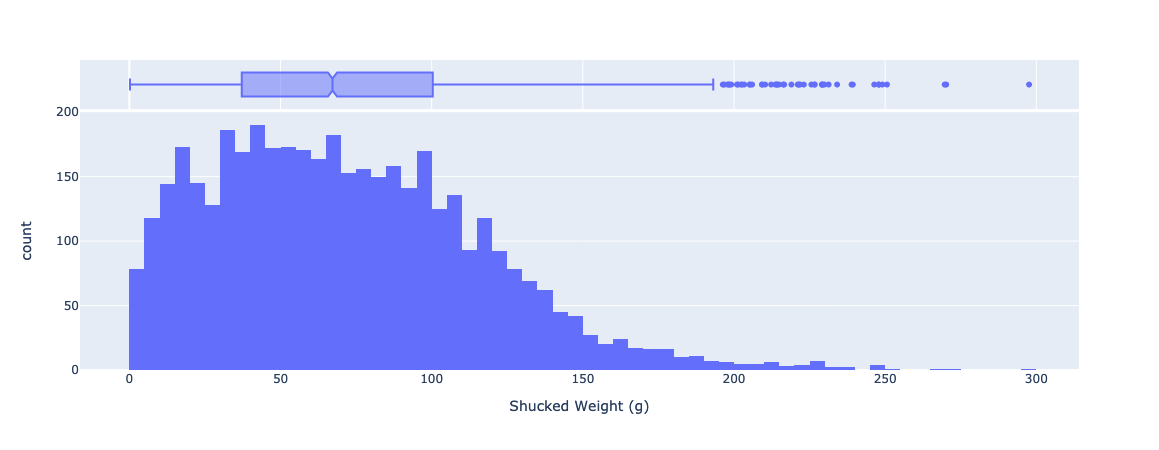

In [14]:
px.histogram(df, x = "shucked_weight", marginal="box", labels={"shucked_weight":"Shucked Weight (g)"})

Indeed, the shape is fairly close to the `whole_weight` distribution. 

The `viscera_weight` is next. Again, because this is derived from the `whole_weight`, I would expect that it would have a similar distribution

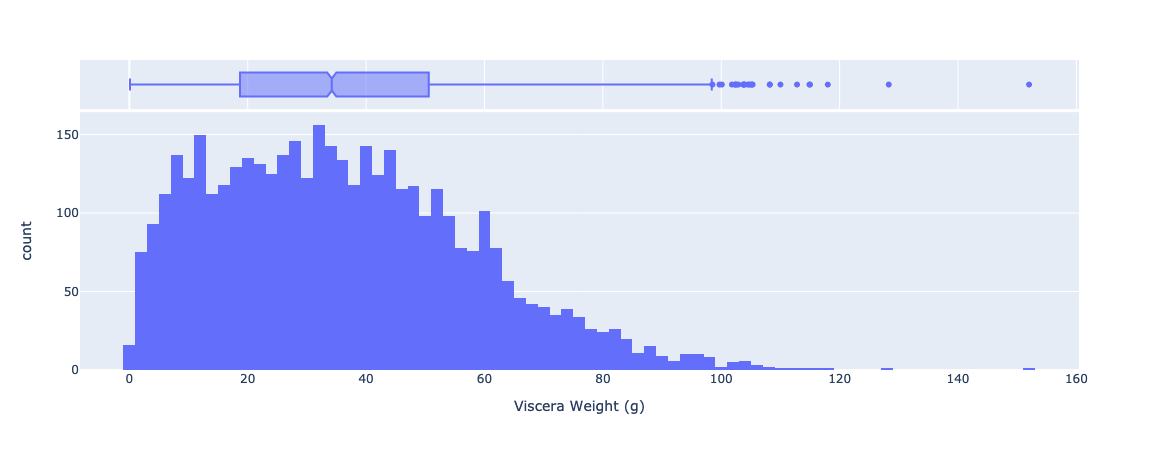

In [15]:
px.histogram(df, x = "viscera_weight", marginal="box", labels={"viscera_weight":"Viscera Weight (g)"})

Again, the shape of the distribution is indeed similar. We note that the weights are growing smaller as more and more of the abalone is removed. 

The final weight feature is the `shell_weight`, as measured after being dried. I would assume that this is the `whole_weight` minus the `shucked_weight`. Again, I would expect this to have a similar shape as all the other weights we have investigated so far.

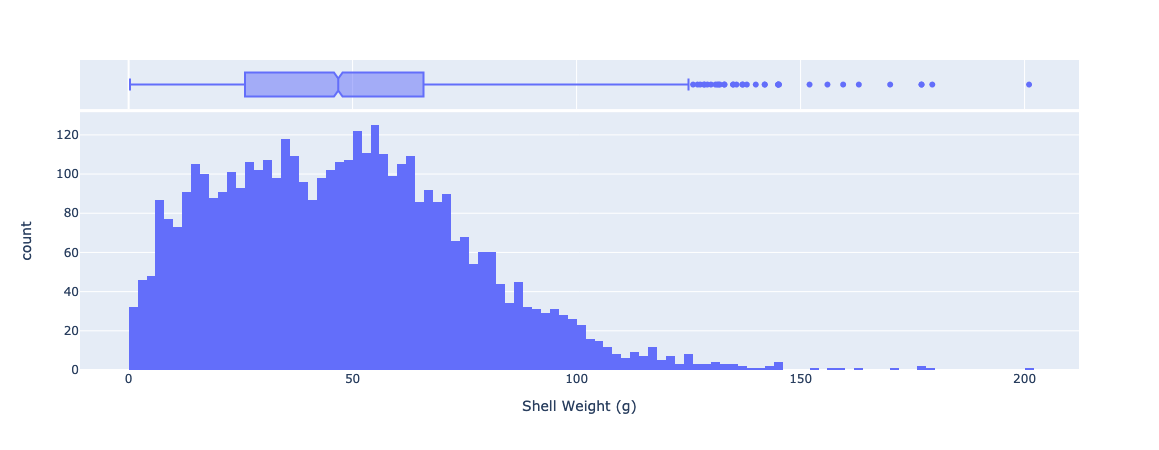

In [16]:
px.histogram(df, x = "shell_weight", marginal="box", labels={"shell_weight":"Shell Weight (g)"})

And again, the shape is fairly similar. 

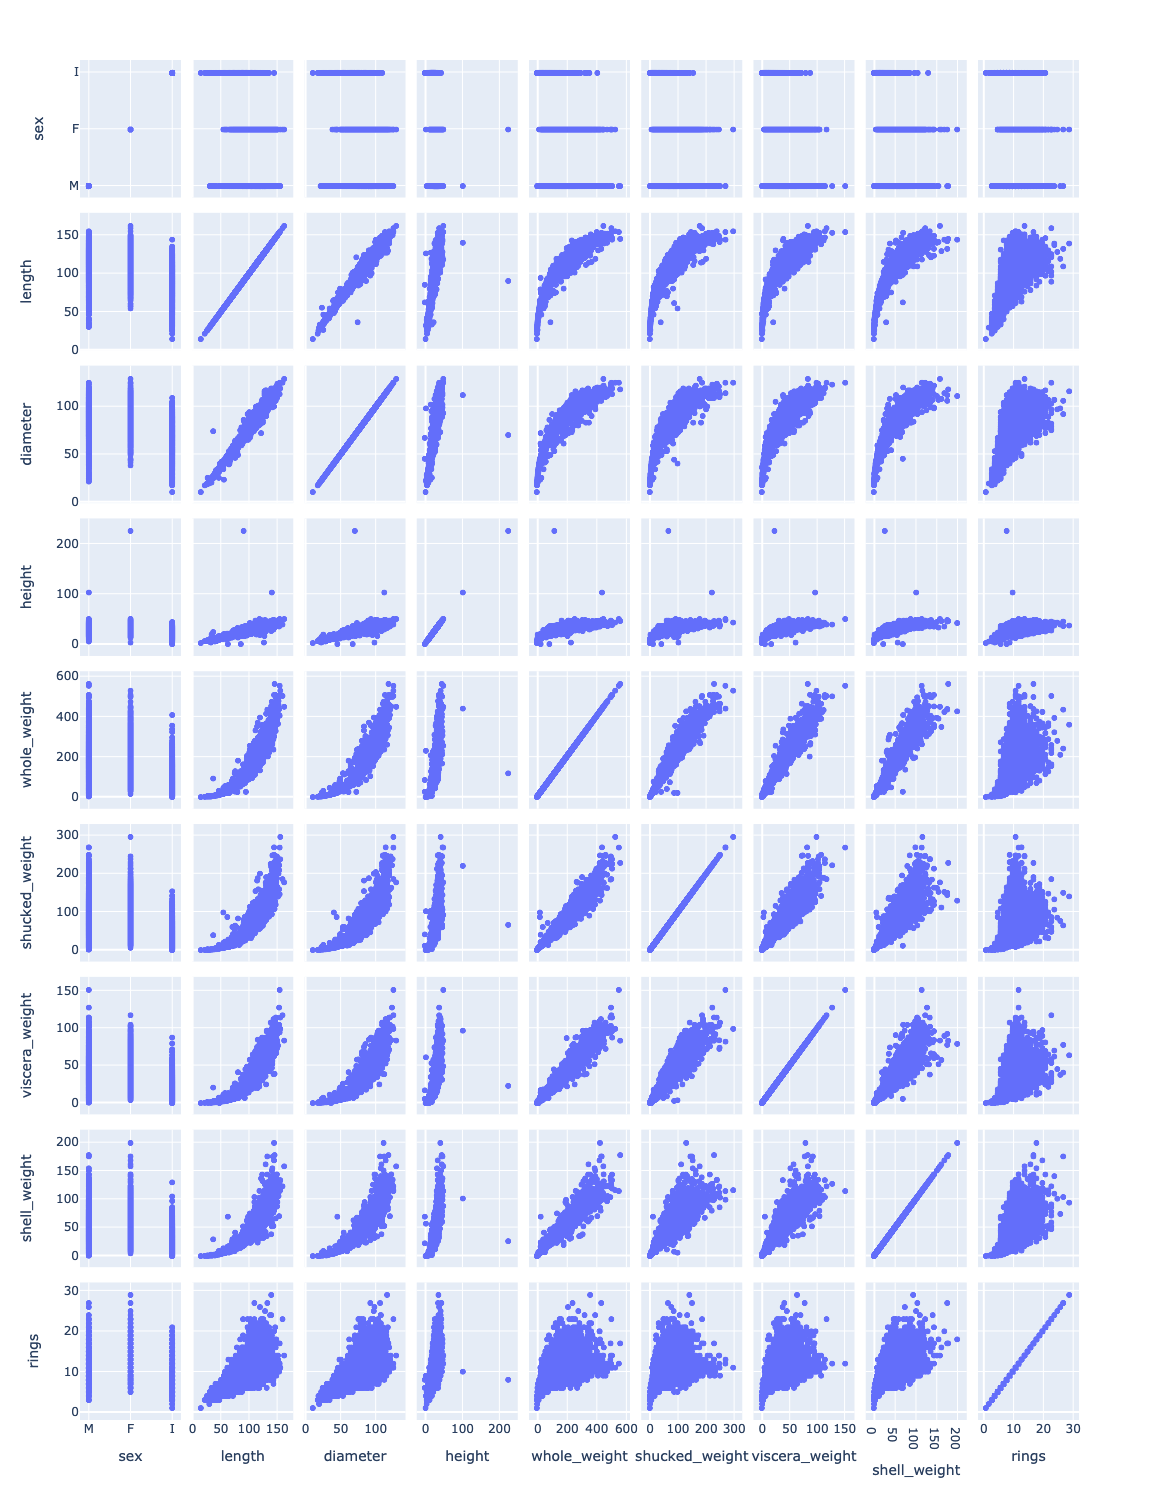

In [21]:
px.scatter_matrix(df, height=1500)

## 1.4 Statistical and Mathematical Modeling



---

**CHECK LIST**

Before you submit this assignent, go back and review the directions to ensure that you have followed each instruction.



*   Have you completed every section and answered every question asked?
*   For every question, have you described your approach and explained your results?
*   Have you checked for spelling and grammar errors?
*   Are your code blocks free of any errors?
*   Have you *SAVED* your notebook?

